# Transfer learning with TensorFlow

In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import os

## Analyzing our training dataset

In [19]:
root_dir = "/media/veracrypt6/flower-classifier-master/"
train_dir = os.path.join(root_dir, "treino")
val_dir = os.path.join(root_dir, "valida")

Text(0.5, 1.0, 'Number of training images per category:')

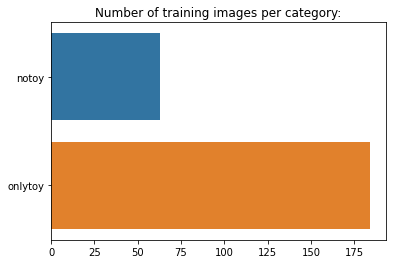

In [20]:
category_names = sorted(os.listdir(train_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = train_dir + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))

sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

## Transfer Learning

We will use the Xception model from tensorflow.

In [21]:
keras.backend.clear_session()

In [22]:
IMG_SIZE = (224, 224) + (3,)
base_model = keras.applications.Xception(include_top=False,
                                         weights="imagenet", input_shape=IMG_SIZE, pooling="avg")

In [23]:
my_model = keras.models.Sequential()
my_model.add(base_model)
my_model.add(keras.layers.Dense(nb_categories, activation="softmax"))

In [24]:
my_model.layers[0].trainable = False

### Loading Data

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
val_data_generator = ImageDataGenerator(rescale=1./255)
train_data_generator = ImageDataGenerator(rescale=1/255)

In [27]:
train_data = train_data_generator.flow_from_directory(train_dir, target_size=(224, 224),
                                              class_mode="categorical", batch_size=12)
val_data = val_data_generator.flow_from_directory(val_dir, target_size=(224, 224),
                                              class_mode="categorical", batch_size=12)

Found 247 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


## Train Model

In [28]:
my_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
checkpoint_path = "/media/flower-classifier-master/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
history = my_model.fit(train_data, epochs=12, validation_data=val_data, callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.




Epoch 1/10
21/21 [==============================] - ETA: 0s - loss: 0.3347 - accuracy: 0.8381
Epoch 00001: saving model to /media/flower-classifier-master/training_1/cp.ckpt
21/21 [==============================] - 36s 2s/step - loss: 0.3347 - accuracy: 0.8381
Epoch 2/10
21/21 [==============================] - ETA: 0s - loss: 0.0698 - accuracy: 0.9919
Epoch 00002: saving model to /media/flower-classifier-master/training_1/cp.ckpt
21/21 [==============================] - 37s 2s/step - loss: 0.0698 - accuracy: 0.9919
Epoch 3/10
21/21 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 0.9960
Epoch 00003: saving model to /media/flower-classifier-master/training_1/cp.ckpt
21/21 [==============================] - 37s 2s/step - loss: 0.0377 - accuracy: 0.9960
Epoch 4/10
21/21 [==============================] - ETA: 0s - loss: 0.0259 - accuracy: 1.0000
Epoch 00004: saving model to /media/flower-classifier-master/training_1/cp.ckpt
21/21 [==============================] - 36

In [30]:
#history = my_model.fit(train_data, epochs=10, validation_data=val_data)

## Save the model

In [31]:
keras.models.save_model(model=my_model, filepath="flower_classifier.hdf5")

Now onto the web app!!